# Part II - (Relationship between number of trips travelled and members' characteristics)
## by (Azeez Yetunde)



## Investigation Overview

In this investigation, I'm most interested in figuring out the time (both the end and start time) and location (both the end and start time) of the trips took place. Also, the characteristics of the user.



## Dataset Overview

The dataset, 2019-fordgobike-tripdata.csv was downloaded from Udacity materials. The dataset consists of 183,412 rides  made in a bike-sharing system covering the greater San Francisco bay area with 15 features. Missing values were sorted out.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
# data wrangling
# replace missing values in the data

for missing_values in ['start_station_name', 'start_station_id', 'start_station_id', 'end_station_id', 'end_station_name',  'member_birth_year']:
    fordgobike[missing_values] = fordgobike[missing_values].fillna(fordgobike[missing_values].mode()[0])
    
# replace missing value in the column for member_gender

fordgobike['member_gender'] = fordgobike['member_gender'].fillna('Other')

# convert start_time data type to datatime
fordgobike.start_time = pd.to_datetime(fordgobike.start_time)

# convert end_time data type to datatime
fordgobike.end_time = pd.to_datetime(fordgobike.end_time)

# convert start_time data type to datatime
fordgobike.start_time = pd.to_datetime(fordgobike.start_time)

# convert end_time data type to datatime
fordgobike.end_time = pd.to_datetime(fordgobike.end_time)

# convert start_date and end_date to datetime format
import datetime as dt

fordgobike['start_day'] =  fordgobike['start_time'].dt.day_name()
fordgobike['start_month'] =  fordgobike['start_time'].dt.month_name()
fordgobike['start_hr'] =  fordgobike['start_time'].dt.hour
fordgobike['start_min'] =  fordgobike['start_time'].dt.minute


fordgobike['end_day'] =  fordgobike['end_time'].dt.day_name()
fordgobike['end_month'] =  fordgobike['end_time'].dt.month_name()
fordgobike['end_hr'] =  fordgobike['end_time'].dt.hour
fordgobike['end_min'] =  fordgobike['end_time'].dt.minute

# convert bike_id data type to string
fordgobike.bike_id = fordgobike.bike_id.astype(str)

# convert start_station_id data type to string
fordgobike.start_station_id = fordgobike.start_station_id.astype(str)

# convert end_station_id data type to string
fordgobike.end_station_id = fordgobike.end_station_id.astype(str)

# convert start_hr data type to string
fordgobike['start_hr'] =  fordgobike['start_hr'].astype(str)

# convert start_min data type to string
fordgobike['start_min'] =  fordgobike['start_min'].astype(str)

# convert end_hr data type to string
fordgobike['end_hr'] =  fordgobike['end_hr'].astype(str)

# convert end_min data type to string
fordgobike['end_min'] =  fordgobike['end_min'].astype(str)



fordgobike['member_age'] = 2019 - fordgobike['member_birth_year']

# convert member_age to integer

fordgobike['member_age'] =  fordgobike['member_age'].astype('int64')

In [4]:
# convert start_month and start_day into ordered categorical types
ordinal_var_dict = {'start_month': ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                   'end_month': ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}
    

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike[var] = fordgobike[var].astype(ordered_var)

## Gender Distribution

The male gender has the highest count

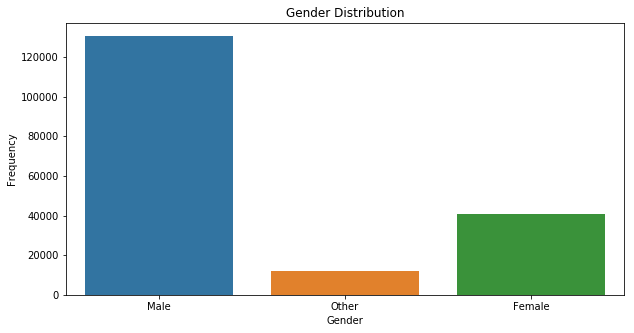

In [5]:

def counting_plot(fordgobike, series, title, x_label, y_label, color):
    plt.figure(figsize=(10,5))
    count_plot = sb.countplot(x = fordgobike[series])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return count_plot

counting_plot(fordgobike, 'member_gender', 'Gender Distribution', 'Gender', 'Frequency', 'base_color');

## Start Days Distribution of Trips

Most of the trips for start days were on Thursdays while weekend (Saturday) has the lowest trip.

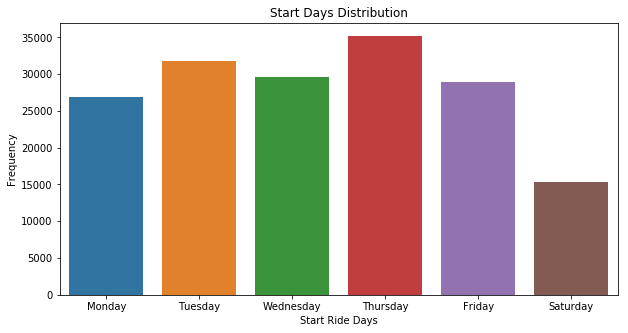

In [6]:
# references: ideas gotten from udacity
# Frequency of Start day ride

base_color = sb.color_palette()[0]
counting_plot(fordgobike, 'start_day', 'Start Days Distribution', 'Start Ride Days', 'Frequency', color = base_color);
 


## Start Days Distribution of Trips

Most of the trips for the end days were on Thursdays while weekend (Saturday) has the lowest trip.

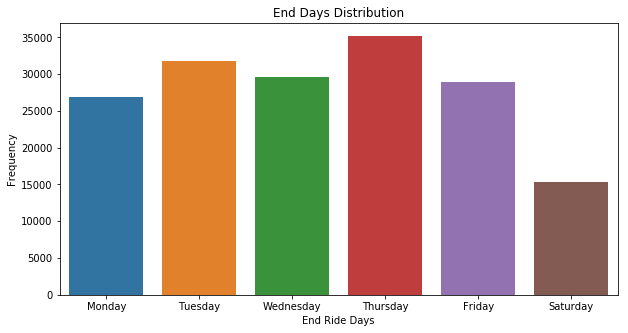

In [7]:
base_color = sb.color_palette()[3]
counting_plot(fordgobike, 'start_day', 'End Days Distribution', 'End Ride Days', 'Frequency', color = base_color);

## Age Distribution of Members

The log transformation showed that majority of the user's ages are between 30 and 35 years old


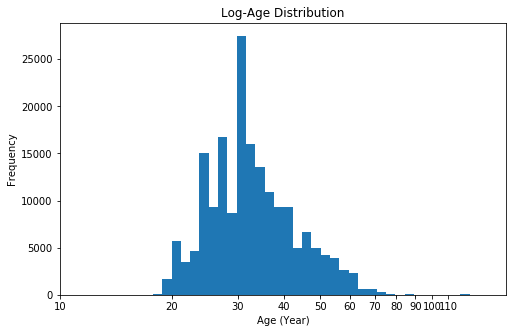

In [8]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(fordgobike['member_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'member_age', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.title('Log-Age Distribution')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency');


### The distribution of the duration of trips for each user type in minutes

Customers go on longer trips than the subcribers since the cutomers has the highest trips.


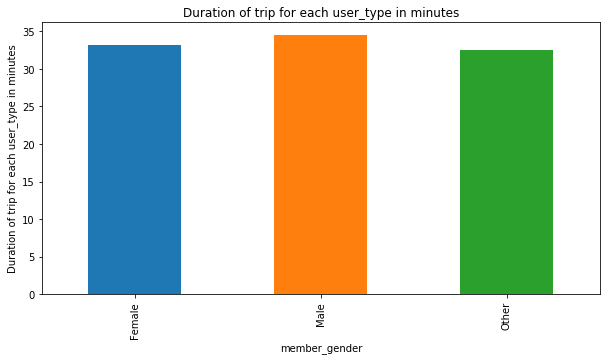

In [9]:

# references: ideas gotten from udacity and google

plt.figure(figsize=(8,5))
def plotting_bar(fordgobike, x, series, title, x_label, y_label):
    plt.figure(figsize=(10,5))
    bar_chart = fordgobike.groupby(x)[series].mean().plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return bar_chart

fordgobike['duration_min'] = fordgobike['duration_sec'] / 60
plotting_bar(fordgobike, 'member_gender', 'member_age', 'Duration of trip for each user_type in minutes', 'member_gender', 'Duration of trip for each user_type in minutes');

## The Relationship between the age of members and the user_type

The above figure shows that the ages of the customer type are more than the subscriber type 

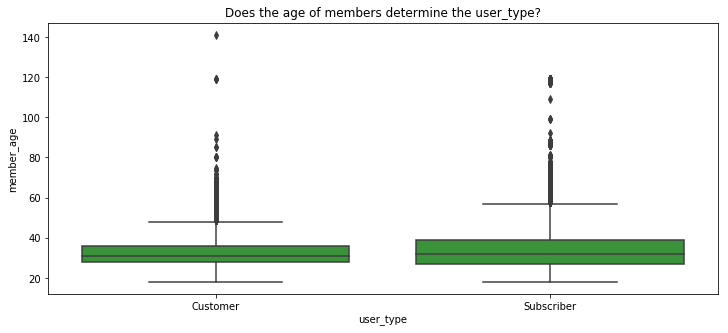

In [10]:
# references: ideas gotten from udacity and google search

plt.figure(figsize=(12,5))
base_color = sb.color_palette()[2]
sb.boxplot(data=fordgobike, x = 'user_type', y = 'member_age', color = base_color)
plt.ylabel('member_age')
plt.xlabel('user_type')
plt.title('Does the age of members determine the user_type?');

## The relationship between member age and duration in seconds
    
From the graph, there is no relationship between the members age and the duration of trips travelled

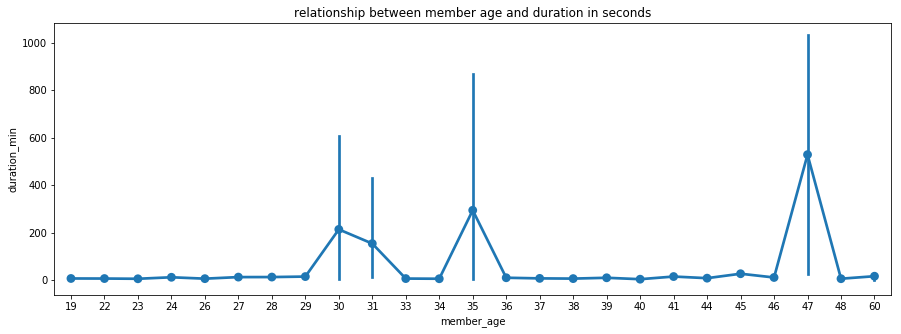

In [11]:
# references: ideas gotten from online search

plt.figure(figsize=(15,5))
ax = sb.pointplot(data = fordgobike.head(50), x = 'member_age', y = 'duration_min')
plt.title('relationship between member age and duration in seconds')
plt.ylabel('duration_min')
plt.xlabel('member_age');

## The relationship between start_day, duration_sec and the user_type

From the figure above, customers travelled the longer distances during the weekday but travelled the longest distances during the weekend (Saturday) while subscribers travelled the shortest distances during the weekday but travelled little more distance on weekend (Saturday 

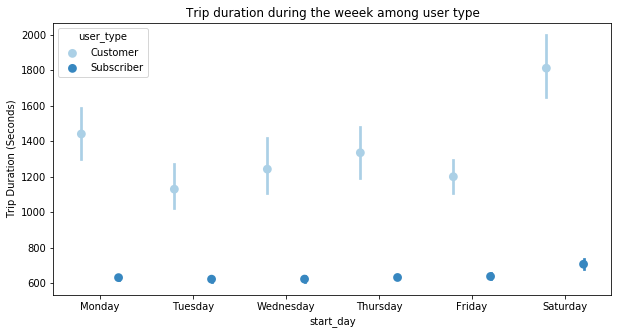

In [12]:
# references: ideas gotten from udacity

fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = fordgobike, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip duration during the weeek among user type')
plt.ylabel('Trip Duration (Seconds)')
ax.set_yticklabels([],minor = True)
plt.show();

### The Relationship between all the numeric variables

There is no correlation between any of the variables and time (duration_min and duration_sec).
There is a strong correlation between start_station_longitude and end_station_longitude and between start_station_latiitude and end_station_latitudeitude.
There is a weak correlation between member_age and duration_min, start_station_latiitude, end_station_latiitude.

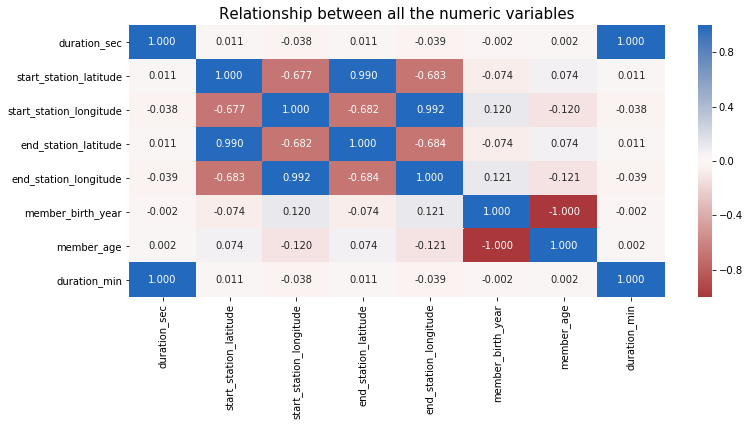

In [13]:
# Correlation
plt.figure(figsize = [12, 5])
sb.heatmap(fordgobike.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship between all the numeric variables', fontsize = 15)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 495269 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 